In [50]:
from google.cloud import vision_v1
from google.oauth2 import service_account
from google.cloud.vision_v1 import types

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [43]:
def extract_text_from_image(image_path, credentials_path, language_hints=None, bounding_poly=None):
    """
    Extracts text from an image file using Google Cloud Vision API.

    Parameters:
        image_path (str): The path to the image file.
        credentials_path (str): The path to the service account key file.
        language_hints (list of str): Optional - BCP-47 language codes.
        bounding_poly (list of dict): Optional - Vertices of the bounding polygon.

    Returns:
        str: Extracted text from the image.
    """
    # Specify the path to the service account key file
    credentials = service_account.Credentials.from_service_account_file(
        credentials_path
    )

    # Instantiates a client
    client = vision_v1.ImageAnnotatorClient(credentials=credentials)

    # Loads the image into memory
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
        image = types.Image(content=content)

    # Prepare image context using language hints and bounding polygon if provided
    image_context = types.ImageContext(
        language_hints=language_hints,
        text_detection_params=types.TextDetectionParams(
            polygon_vertex_constraints=bounding_poly
        ) if bounding_poly else None
    )

    # Performs text detection on the image file
    response = client.document_text_detection(image=image, image_context=image_context)
    texts = response.text_annotations

    # Extract and return the text from the response
    if texts:
        return texts[0].description
    else:
        return "No text found in the image."


In [44]:
credentials_path = './mythical-temple-398110-51b8df2184f0.json'


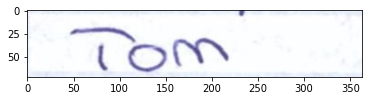

Extracted Text: Tom


In [53]:
# Example usage:
image_path = 'tom.jpg'

# Language hints and bounding polygon
language_hints = ['fr']
bounding_poly = None
"""
bounding_poly = [
    {"x": 30, "y": 10},
    {"x": 150, "y": 10},
    {"x": 150, "y": 80},
    {"x": 30, "y": 80}
]
"""
extracted_text = extract_text_from_image(image_path, credentials_path, language_hints)


# Display the image
img = Image.open(image_path)
fig, ax = plt.subplots(1)
ax.imshow(img)

# Draw the bounding polygon if provided
if bounding_poly:
    poly = patches.Polygon(bounding_poly, edgecolor='r', facecolor='none')
    ax.add_patch(poly)

plt.show()



print('Extracted Text:', extracted_text)


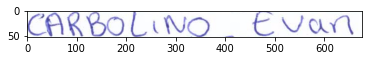

Extracted Text: CARBOLINO
Evan


In [54]:
# Example usage:
image_path = 'SIP_00019_1_V.jpg'

# Language hints and bounding polygon
language_hints = ['fr']
bounding_poly = None
"""
bounding_poly = [
    {"x": 30, "y": 10},
    {"x": 150, "y": 10},
    {"x": 150, "y": 80},
    {"x": 30, "y": 80}
]
"""

extracted_text = extract_text_from_image(image_path, credentials_path, language_hints)


# Display the image
img = Image.open(image_path)
fig, ax = plt.subplots(1)
ax.imshow(img)

# Draw the bounding polygon if provided
if bounding_poly:
    poly = patches.Polygon(bounding_poly, edgecolor='r', facecolor='none')
    ax.add_patch(poly)

plt.show()

print('Extracted Text:', extracted_text)